In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load cleaned dataset
df = pd.read_csv("data/cleaned_superstore.csv")
df.head()


,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,category,sub-category,product_name,sales,quantity,discount,profit,order_year,order_month,profit_margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,0.16
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,0.30
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,0.47
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,-0.40
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,0.11


In [2]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit', 'order_year',
       'order_month', 'profit_margin'],
      dtype='object')

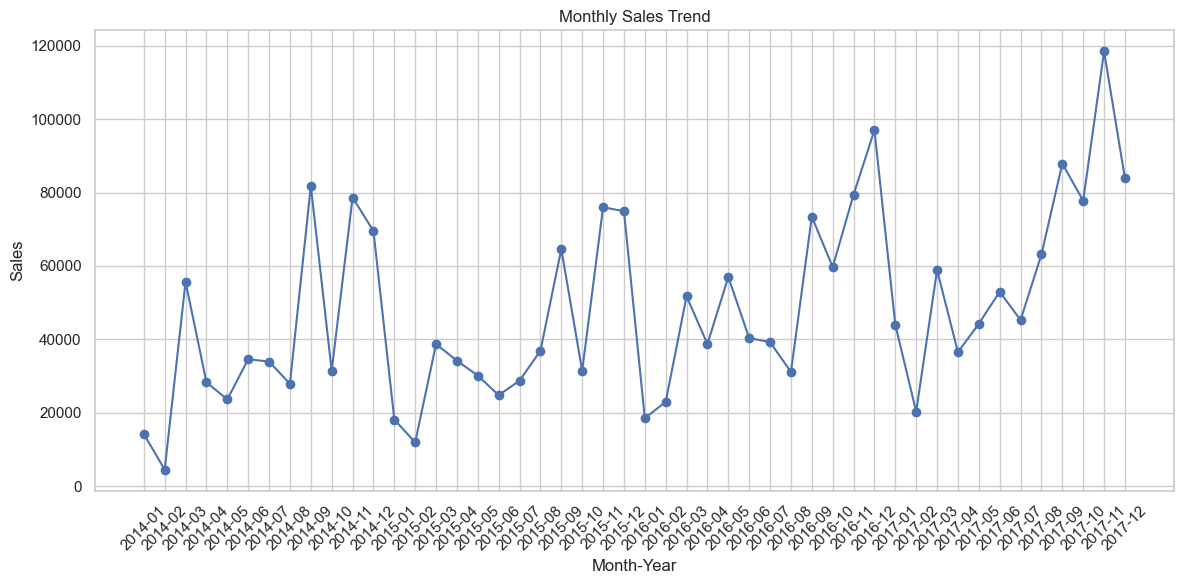

In [3]:
df['order_date'] = pd.to_datetime(df['order_date'])

monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['sales'].sum().reset_index()
monthly_sales['order_date'] = monthly_sales['order_date'].astype(str)

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['order_date'], monthly_sales['sales'], marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


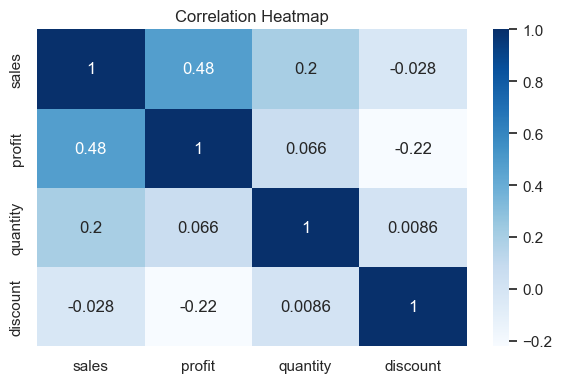

In [4]:
corr = df[['sales', 'profit', 'quantity', 'discount']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


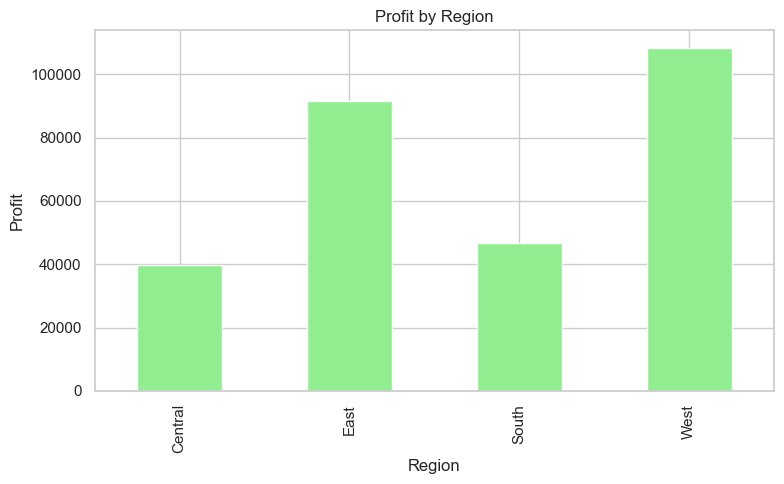

In [5]:
region_profit = df.groupby('region')['profit'].sum()

plt.figure(figsize=(8,5))
region_profit.plot(kind='bar', color='lightgreen')
plt.title("Profit by Region")
plt.xlabel("Region")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()


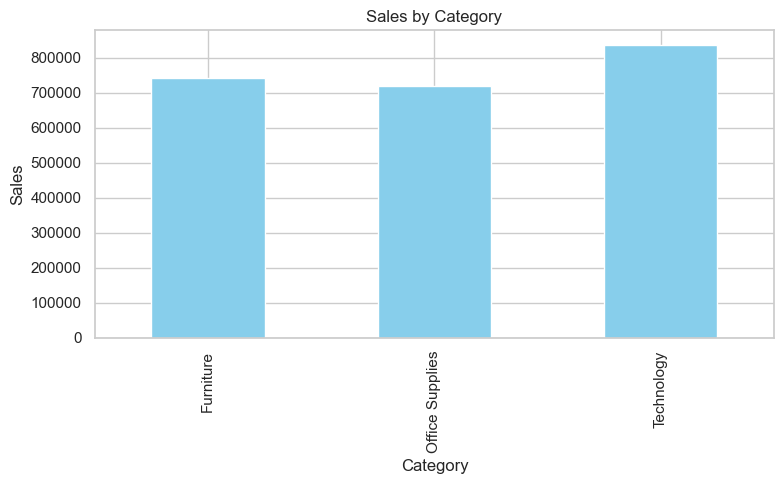

In [6]:
category_sales = df.groupby('category')['sales'].sum()

plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color='skyblue')
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


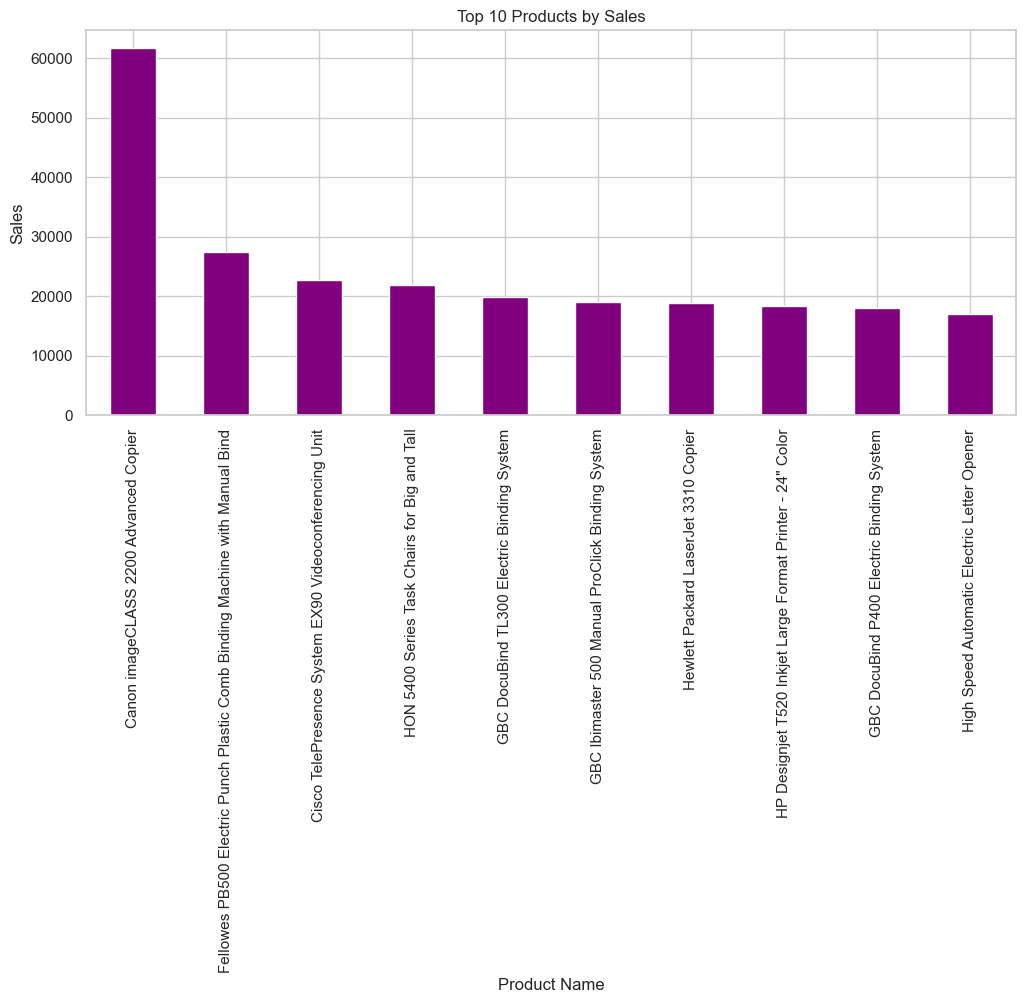

In [8]:
top_products = df.groupby('product_name')['sales'].sum().nlargest(10)

plt.figure(figsize=(12,5))
top_products.plot(kind='bar', color='purple')
plt.title("Top 10 Products by Sales")
plt.xlabel("Product Name")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()


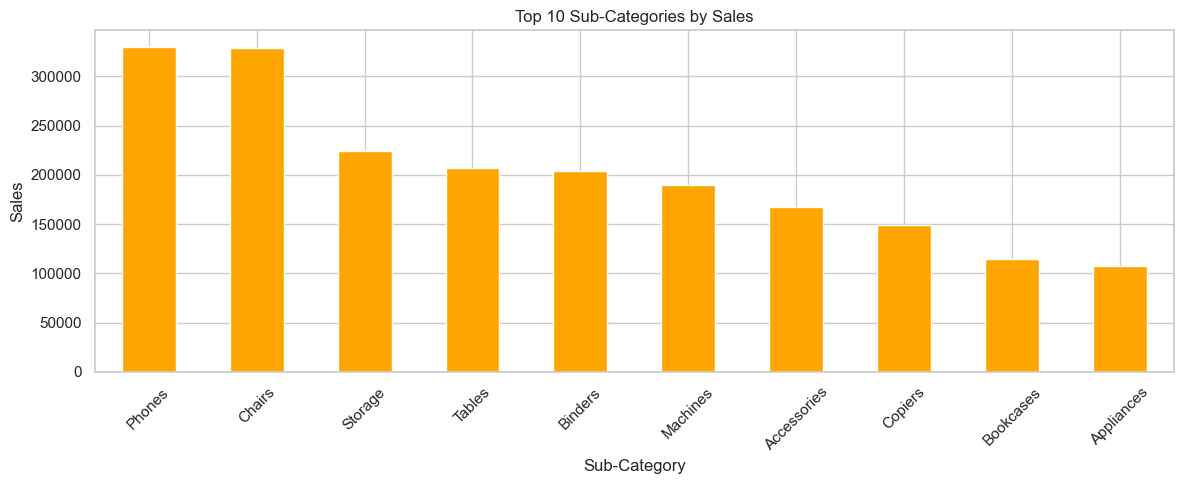

In [9]:
subcat_sales = df.groupby('sub-category')['sales'].sum().nlargest(10)

plt.figure(figsize=(12,5))
subcat_sales.plot(kind='bar', color='orange')
plt.title("Top 10 Sub-Categories by Sales")
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
